In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.io import loadmat
from sklearn.svm import SVC

## Support Vector Machine ##

> The advantages of support vector machines are:

> * Effective in high dimensional spaces.
> * Still effective in cases where number of dimensions is greater than the number of samples.
> * Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
> * Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

> The disadvantages of support vector machines include:

> * If the number of features is much greater than the number of samples, the method is likely to give poor performances.
> * SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.  
> [scikit-learn docs](http://scikit-learn.org/stable/modules/svm.html)



In [2]:
def plotData(X, y):
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    
    plt.axis('off')
    plt.scatter(X[pos,0], X[pos,1], s=60, c='#097054', marker='+', linewidths=1)
    plt.scatter(X[neg,0], X[neg,1], s=60, c='#FFDE00', marker='o', linewidths=1)

def plot_svc(clf, X, y, h=0.05, padding=0.05):
    
    x_min, x_max = X[:, 0].min()-padding, X[:, 0].max()+padding
    y_min, y_max = X[:, 1].min()-padding, X[:, 1].max()+padding
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    cmap = plt.cm.get_cmap("winter")
    cmap.set_under("magenta")
    cmap.set_over("yellow")
    
    plt.figure(figsize=(15,5))
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=cmap)

    plotData(X, y)
    
    sv = clf.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='w', marker='o', s=12, label='Support Vectors')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.legend()
    plt.show()

In [3]:
data = loadmat('../datasets/svm.mat')

y = data['y']
X = data['X']

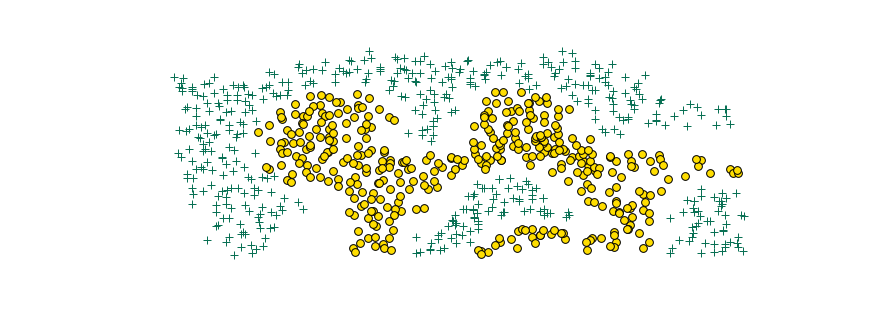

In [4]:
plt.figure(figsize=(15,5))
plotData(X, y)


### Polynomial Kernel ###

In [ ]:
clf1 = SVC(C=1.0, kernel='poly', degree=7, gamma=3)
clf1.fit(X, y.ravel())
plot_svc(clf1, X, y)

### RBF - Radial Basis function ###
$$ K(x_{1},x_{2}) = exp ( - \gamma || x_{1} - x_{2} ||^{2}  ) $$  

>Intuitively, the **gamma** parameter defines how far the influence of a single training example reaches, with *low* values meaning ‘far’ and *high* values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

>The **C** parameter trades off misclassification of training examples against simplicity of the decision surface. A *low* C makes the decision surface smooth, while a *high* C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors

> [scikit-learn docs](http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)

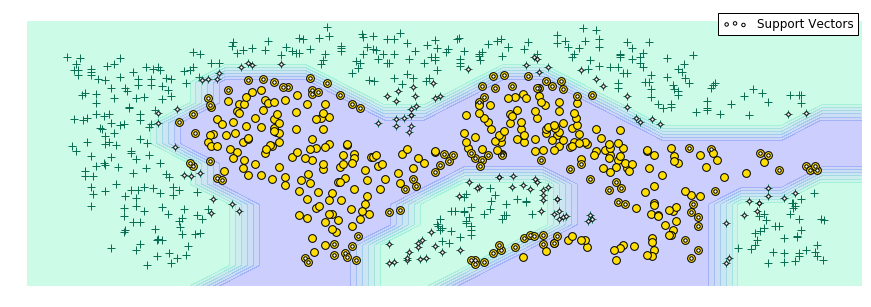

In [6]:
clf2 = SVC(C=3.0, kernel='rbf', gamma=20)
clf2.fit(X, y.ravel())
plot_svc(clf2, X, y)